## Exploratory Data Analysis (EDA)

Goal - Create a similarity metric based on just the numerical data (elevation gain, distance, star rating)

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder ,LabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, linear_kernel
from scipy.spatial.distance import cdist


### READ IN PICKLE DATA FILE

In [229]:
#Read in pickle data file
data=pd.read_pickle('../data/alltrails_ontario.pkl')
data1=pd.read_pickle('../data/alltrails_ontario.pkl')
# data1=

In [287]:
tn=data['name'].str.lower()
data['trailName']=tn

In [289]:
data
data.to_pickle('../data/alltrails_ontario_curated.pkl')

### CURATION
1. Change trail attributes to string for TF-IDF
2. Remove nan from elevation data

In [230]:
#Replace nan with 0. - I had to do this since elevation had a few rows with nan
data.loc[np.isnan(data['elevation'])|(data['elevation']<0.1), 'elevation'] = 1

In [231]:
#Curate trail attributes to create single words for each array element
trail_attributes=data.trail_attributes
hattrib=[]
for l1 in trail_attributes:
    hattrib.append([l2.replace(' ', '') for l2 in l1])
print (hattrib[0])

# Add the curated attibutes as a new column ('tagstr') in data
data['tagstr']=pd.Series(hattrib)
data['tagstr']=[' '.join(tag) for tag in data.tagstr.values]
data.head(2)

['dogsonleash', 'wheelchairfriendly', 'kidfriendly', 'strollerfriendly', 'hiking', 'mountainbiking', 'naturetrips', 'snowshoeing', 'trailrunning', 'walking', 'forest', 'paved', 'views', 'snow']


,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,tagstr
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",dogsonleash wheelchairfriendly kidfriendly str...
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",dogsonleash crosscountryskiing fishing hiking ...


###  cosine similarity metric based on tag strings

In [232]:
# Create cosine similarity metric based on tag strings
tfidf=TfidfVectorizer()
tfidf_mat=tfidf.fit_transform(data['tagstr'])
tfidf_mat.shape

cosine_sim_tagstr = linear_kernel(tfidf_mat,tfidf_mat)
cosine_sim_tagstr[10][:20]
cosine_sim_tagstr.shape

(1215, 1215)

###  cosine similarity metric based on trail difficulty used as category

In [233]:
# Create cosine similarity metric based on trail difficulty used as category
data['difficulty'].astype('category')
# data
lb=LabelBinarizer()
lb_diffic=lb.fit_transform(data['difficulty'])
# lb_diffic[:12]
# data.head(10)

cosine_sim_diffic = linear_kernel(lb_diffic,lb_diffic)
cosine_sim_diffic.shape

(1215, 1215)

### Reverse mapping of indices with corresponding trail names

In [234]:
# Reverse map ofindices with corresponding trail names
trail_indices=pd.Series(data.index, index=data['name']).drop_duplicates()
len(trail_indices)
# trail_indices

1215

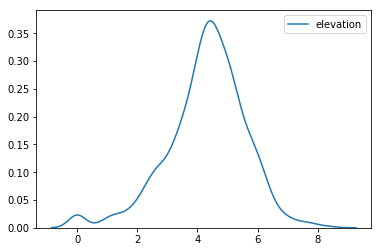

In [235]:
# Testing numerical data
elev=data['elevation']
#Natural log of elevation
log_elev=np.log(elev)
data['log_elevation']=log_elev
sns.kdeplot(log_elev)
# data.head(5)

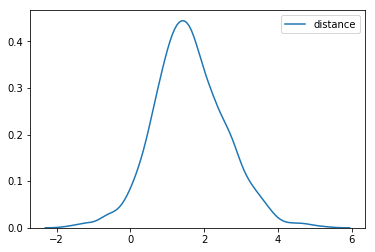

In [236]:
dist=data['distance']
log_dist=np.log(dist)
log_dist
data['log_distance']=log_dist
sns.kdeplot(log_dist)
# data.head(2)

###  cosine similarity metric for numerical data

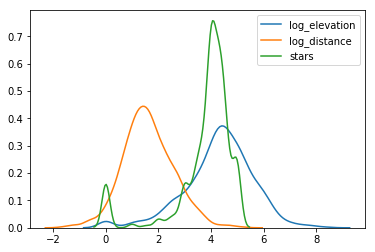

In [237]:
num_data=data[['log_elevation','log_distance','stars']]
sns.kdeplot(data['log_elevation'])
sns.kdeplot(data['log_distance'])
sns.kdeplot(data['stars'])
# num_data['log_elevation']

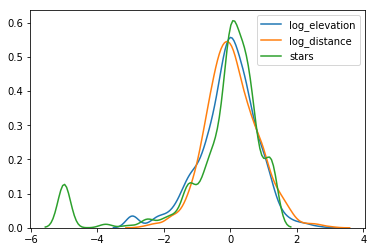

In [238]:
# Robust scaling for numerical data
scaler=RobustScaler()
# scaler=StandardScaler()
scaled_numdata=scaler.fit_transform(num_data)
scaled_numdata=pd.DataFrame(scaled_numdata, columns=['log_elevation', 'log_distance', 'stars'])
sns.kdeplot(scaled_numdata['log_elevation'])
sns.kdeplot(scaled_numdata['log_distance'])
sns.kdeplot(scaled_numdata['stars'])

In [239]:
# Cosine similarity for numerical data
scaled_numdata.shape
cosine_sim_num = linear_kernel(scaled_numdata, scaled_numdata)
cosine_sim_num1 = cosine_similarity(scaled_numdata, scaled_numdata)
cosine_sim_num[0], cosine_sim_num[1]

(array([ 0.55788665, -0.03610592, -0.49512622, ...,  0.45589055,
         2.11114822,  0.15141181]),
 array([-0.03610592,  0.16815323,  0.3060822 , ..., -0.27964914,
        -1.19278599,  0.06182081]))

###  cosine similarity of numerical data - only elevation and distance

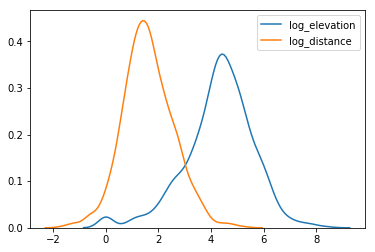

In [240]:
num_data2=data[['log_elevation','log_distance']]
sns.kdeplot(data['log_elevation'])
sns.kdeplot(data['log_distance'])
# num_data['log_elevation']

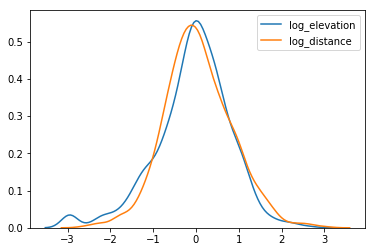

In [241]:
# Robust scaling for numerical data
scaler=RobustScaler()
# scaler=StandardScaler()
scaled_numdata2=scaler.fit_transform(num_data2)
scaled_numdata2=pd.DataFrame(scaled_numdata2, columns=['log_elevation', 'log_distance'])
sns.kdeplot(scaled_numdata2['log_elevation'])
sns.kdeplot(scaled_numdata2['log_distance'])

In [271]:
# Cosine similarity for numerical data
scaled_numdata2.shape
cosine_sim_num2 = linear_kernel(scaled_numdata2, scaled_numdata2)
cosine_sim_num2c = cosine_similarity(scaled_numdata2, scaled_numdata2)
cosine_sim_num2[0], cosine_sim_num2c[1]
cosine_sim_num2c.shape
cosine_sim_num2c

array([[ 1.        ,  0.97521905, -0.43241187, ...,  0.40333187,
         0.73553754,  0.33880283],
       [ 0.97521905,  1.        , -0.22220807, ...,  0.59578481,
         0.8671978 ,  0.5385637 ],
       [-0.43241187, -0.22220807,  1.        , ...,  0.65067672,
         0.29281602,  0.70184636],
       ...,
       [ 0.40333187,  0.59578481,  0.65067672, ...,  1.        ,
         0.91659999,  0.99758509],
       [ 0.73553754,  0.8671978 ,  0.29281602, ...,  0.91659999,
         1.        ,  0.88661801],
       [ 0.33880283,  0.5385637 ,  0.70184636, ...,  0.99758509,
         0.88661801,  1.        ]])

###  Create cosine similarity based on all features

In [269]:
#Combined features where only distance and elevation are used for the numerical data
combined_features_sim2=np.concatenate([cosine_sim_tagstr, cosine_sim_diffic, cosine_sim_num2], axis=1)
combined_features_sim2.shape

#Calculate similarity matrix for combined features
cosine_sim_allfeat2=cosine_similarity(combined_features_sim2, combined_features_sim2)
cosine_sim_allfeat2[0][:10]
# cosine_sim_allfeat2.shape

array([ 1.        ,  0.89425601,  0.8037629 ,  0.38365813, -0.13906687,
        0.114582  ,  0.8884473 ,  0.13253397,  0.0605837 , -0.29819394])

In [273]:
#Combined features where stars, distance and elevation are used for the numerical data
combined_features_sim3=np.concatenate([cosine_sim_tagstr, cosine_sim_diffic, cosine_sim_num], axis=1)
combined_features_sim3.shape

#Calculate similarity matrix for combined features
cosine_sim_allfeat3=cosine_similarity(combined_features_sim3, combined_features_sim3)
type(cosine_sim_allfeat3)

numpy.ndarray

###  Write cosine similarity based on all features into a pickle file

In [275]:
# mat=np.matrix(cosine_sim_allfeat2)
# mat.dump('cosine_sim2.dat')

np.savetxt('cosine_sim2.dat', cosine_sim_allfeat2)

In [280]:
x=np.loadtxt('../data/cosine_sim2.dat')
type(x)
# x

numpy.ndarray

In [246]:
mat3=np.matrix(cosine_sim_allfeat3)
mat3.dump('cosine_sim3.dat')


In [247]:
data.head()

,difficulty,distance,elevation,name,nreviews,review,route_type,stars,trail_attributes,tagstr,log_elevation,log_distance
0,MODERATE,5.6,32.0,Taylor Creek Trail,23,"Great for strollers, bikes etc. Opposite side ...",Out & Back,3.7,"[dogs on leash, wheelchair friendly, kid frien...",dogsonleash wheelchairfriendly kidfriendly str...,3.465736,1.722767
1,MODERATE,4.7,64.0,Hilton Falls Trail,238,What a gem! I was so pleasantly surprised by ...,Loop,4.3,"[dogs on leash, cross country skiing, fishing,...",dogsonleash crosscountryskiing fishing hiking ...,4.158883,1.547563
2,MODERATE,2.3,100.0,Niagara Glen Trail,135,Beautiful area with several trails. Loved exp...,Loop,4.7,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips wal...,4.605170,0.832909
3,MODERATE,7.2,128.0,Nassagaweya and Bruce Trail Loop from Rattlesn...,170,Great views! We went in January so there weren...,Loop,4.2,"[dogs on leash, kid friendly, hiking, nature t...",dogsonleash kidfriendly hiking naturetrips sno...,4.852030,1.974081
4,MODERATE,15.3,427.0,Lion's Head Loop Via Bruce Trail,117,Amazing trail with stunning lookouts. Hiked it...,Loop,4.8,"[dogs on leash, hiking, nature trips, walking,...",dogsonleash hiking naturetrips walking birdwat...,6.056784,2.727853


In [284]:
cosine_sim=np.loadtxt('../data/cosine_sim2.dat')


def recommendations_trailname(trail_name, cosine_sim=cosine_sim):
    indices=pd.Series(data.index, index=data['name'].str.lower())
    index=indices[trail_name]
    print ('index', index)
    #Extract pairwise similarity score with all trails for the input trail
    similarity_scores=list(enumerate(cosine_sim[index]))
#     print (similarity_scores)
    #Sort scores to extract the top ranked trails
    sorted_scores=sorted(similarity_scores, key=lambda x:x[1], reverse=True)
    sorted_scores=sorted_scores[1:11]
    print (sorted_scores)

np.squeeze(np.array(cosine_sim))
recommendations_trailname('hilton falls trail')

index 1
[(442, 0.9829678736877491), (325, 0.9825410201954988), (130, 0.9728747080398896), (269, 0.968575693936848), (716, 0.965348896476093), (540, 0.9652673700929668), (1114, 0.9613720373617043), (896, 0.9612984335043019), (877, 0.9601624237303154), (154, 0.9597624255427394)]


In [ ]:
# data['trailName']=data['name'].str.lower()
# data